# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 04 · Notebook 04 — Probability Distributions
**Instructor:** Amir Charkhi  |  **Goal:** Master probability distributions to predict and model real-world phenomena.

> Format: short theory → quick practice → build understanding → mini-challenges.


---
## Learning Objectives
- Understand what probability distributions are and why they matter
- Master the normal distribution and its magical properties
- Work with other key distributions (binomial, uniform)
- Apply distributions to solve real business problems
- Use Python's scipy.stats like a pro

## 1. What Are Probability Distributions?
**Your crystal ball for data**: Distributions tell you what values are possible and how likely each one is!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for nice plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)
%matplotlib inline

In [2]:
# Real-world examples of distributions
examples = {
    "📏 Heights": "Normal - most people average height, few very tall/short",
    "🎯 Test Scores": "Normal - most students score around average", 
    "💰 Income": "Right-skewed - few people earn very high incomes",
    "🎲 Dice Rolls": "Uniform - all outcomes equally likely",
    "📞 Call Center Calls": "Poisson - random events over time",
    "🪙 Coin Flips": "Binomial - counting successes in trials"
}

print("🌍 Distributions in the Real World:")
for phenomenon, description in examples.items():
    print(f"   {phenomenon}: {description}")
    
print("\n💡 Key insight: Once you know the distribution, you can make predictions!")

🌍 Distributions in the Real World:
   📏 Heights: Normal - most people average height, few very tall/short
   🎯 Test Scores: Normal - most students score around average
   💰 Income: Right-skewed - few people earn very high incomes
   🎲 Dice Rolls: Uniform - all outcomes equally likely
   📞 Call Center Calls: Poisson - random events over time
   🪙 Coin Flips: Binomial - counting successes in trials

💡 Key insight: Once you know the distribution, you can make predictions!


## 2. The Normal Distribution: The Star of Statistics

### 2.1 Why Normal Distributions Rule the World

In [3]:
# Generate and explore normal distribution
mu = 100    # mean (center)
sigma = 15  # standard deviation (spread)
size = 1000

# Generate IQ scores (classic normal distribution example)
iq_scores = np.random.normal(mu, sigma, size)

print(f"🧠 IQ Score Distribution (n={size:,})")
print(f"   Target: mean={mu}, std={sigma}")
print(f"   Actual: mean={np.mean(iq_scores):.1f}, std={np.std(iq_scores, ddof=1):.1f}")
print(f"\n📊 Sample statistics match the theory!")

🧠 IQ Score Distribution (n=1,000)
   Target: mean=100, std=15
   Actual: mean=100.4, std=15.1

📊 Sample statistics match the theory!


### 2.2 The Famous 68-95-99.7 Rule

In [4]:
# Verify the 68-95-99.7 rule
within_1_std = np.sum((iq_scores >= mu - sigma) & (iq_scores <= mu + sigma)) / len(iq_scores)
within_2_std = np.sum((iq_scores >= mu - 2*sigma) & (iq_scores <= mu + 2*sigma)) / len(iq_scores)
within_3_std = np.sum((iq_scores >= mu - 3*sigma) & (iq_scores <= mu + 3*sigma)) / len(iq_scores)

print("🎯 The Magic 68-95-99.7 Rule:")
print(f"   Within 1 std: {within_1_std:.1%} (theory: 68.0%)")
print(f"   Within 2 std: {within_2_std:.1%} (theory: 95.0%)")
print(f"   Within 3 std: {within_3_std:.1%} (theory: 99.7%)")
print(f"\n💡 This rule works for ANY normal distribution!")

🎯 The Magic 68-95-99.7 Rule:
   Within 1 std: 66.4% (theory: 68.0%)
   Within 2 std: 95.3% (theory: 95.0%)
   Within 3 std: 99.8% (theory: 99.7%)

💡 This rule works for ANY normal distribution!


C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


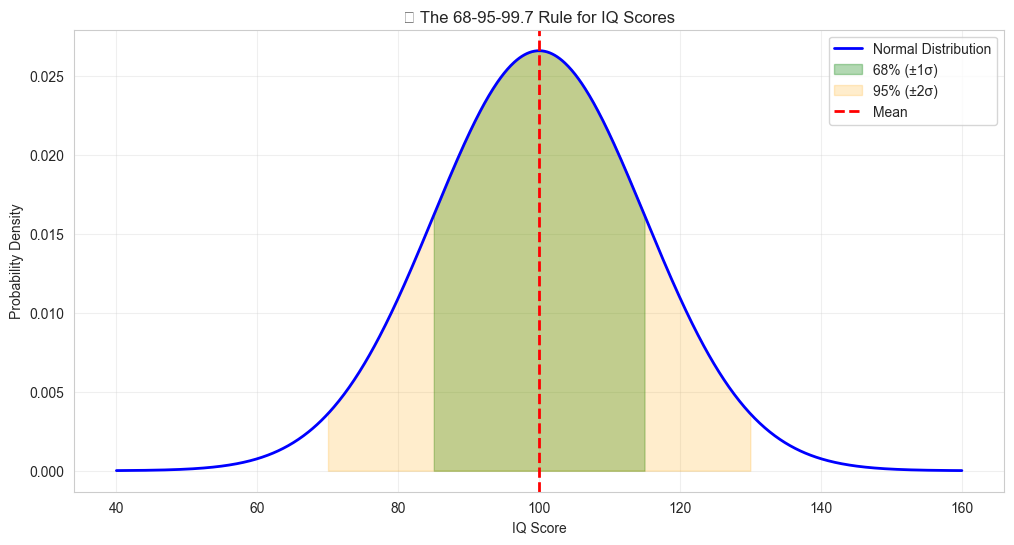

In [5]:
# Visualize the rule
plt.figure(figsize=(12, 6))
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y, 'b-', linewidth=2, label='Normal Distribution')

# Fill areas for the rule
x1 = x[(x >= mu - sigma) & (x <= mu + sigma)]
y1 = stats.norm.pdf(x1, mu, sigma)
plt.fill_between(x1, y1, alpha=0.3, color='green', label='68% (±1σ)')

x2 = x[(x >= mu - 2*sigma) & (x <= mu + 2*sigma)]
y2 = stats.norm.pdf(x2, mu, sigma)
plt.fill_between(x2, y2, alpha=0.2, color='orange', label='95% (±2σ)')

plt.axvline(mu, color='red', linestyle='--', linewidth=2, label='Mean')
plt.title('🧠 The 68-95-99.7 Rule for IQ Scores')
plt.xlabel('IQ Score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Exercise 1 — Applying the Rule (easy)**  
Use the 68-95-99.7 rule to make predictions about exam scores.


In [ ]:
# Exam scores: mean=75, std=10
exam_mean = 75
exam_std = 10

# Your turn: What percentage of students score between 65 and 85?
# What range contains the middle 95% of scores?


<details>
<summary><b>Solution</b></summary>

```python
print("📝 Exam Score Analysis (mean=75, std=10):")
print(f"\n68% of students score between: {exam_mean - exam_std} and {exam_mean + exam_std}")
print(f"95% of students score between: {exam_mean - 2*exam_std} and {exam_mean + 2*exam_std}")
print(f"99.7% of students score between: {exam_mean - 3*exam_std} and {exam_mean + 3*exam_std}")
print(f"\n🎯 Between 65-85: About 68% of students")
print(f"🎯 Middle 95% range: 55 to 95 points")
print(f"\n💡 Scores below 45 or above 105 are extremely rare!")
```
</details>

## 3. Working with Normal Distributions in Python

In [6]:
# Create a normal distribution object
height_dist = stats.norm(loc=170, scale=10)  # loc=mean, scale=std

print("📏 Human Height Distribution (cm):")
print(f"   Mean: {height_dist.mean():.0f} cm")
print(f"   Std: {height_dist.std():.0f} cm")

# Answer probability questions
prob_tall = 1 - height_dist.cdf(180)  # P(height > 180)
prob_range = height_dist.cdf(175) - height_dist.cdf(165)  # P(165 < height < 175)

print(f"\n🤔 Probability Questions:")
print(f"   P(height > 180cm) = {prob_tall:.2%}")
print(f"   P(165cm < height < 175cm) = {prob_range:.2%}")

📏 Human Height Distribution (cm):
   Mean: 170 cm
   Std: 10 cm

🤔 Probability Questions:
   P(height > 180cm) = 15.87%
   P(165cm < height < 175cm) = 38.29%


In [7]:
# Find percentiles (what height is at the 90th percentile?)
percentile_90 = height_dist.ppf(0.90)
percentile_10 = height_dist.ppf(0.10)
median_height = height_dist.ppf(0.50)

print("📊 Height Percentiles:")
print(f"   10th percentile: {percentile_10:.1f} cm")
print(f"   50th percentile (median): {median_height:.1f} cm")
print(f"   90th percentile: {percentile_90:.1f} cm")
print(f"\n💡 90% of people are between {percentile_10:.0f}cm and {percentile_90:.0f}cm")

📊 Height Percentiles:
   10th percentile: 157.2 cm
   50th percentile (median): 170.0 cm
   90th percentile: 182.8 cm

💡 90% of people are between 157cm and 183cm


## 4. Z-Scores: The Universal Language

In [8]:
# Standard normal distribution (mean=0, std=1)
standard_normal = stats.norm(0, 1)

# Convert any normal distribution to standard
original_scores = [85, 70, 95, 60]
test_mean = 75
test_std = 10

print("🔄 Converting to Z-Scores:")
print("Original Score | Z-Score | Interpretation")
print("-" * 45)

for score in original_scores:
    z_score = (score - test_mean) / test_std
    if z_score > 2:
        interpretation = "🌟 Exceptional"
    elif z_score > 1:
        interpretation = "😊 Above Average"
    elif z_score > -1:
        interpretation = "😐 Average"
    elif z_score > -2:
        interpretation = "😕 Below Average"
    else:
        interpretation = "😰 Concerning"
    
    print(f"     {score:2d}        |  {z_score:+4.1f}   | {interpretation}")

🔄 Converting to Z-Scores:
Original Score | Z-Score | Interpretation
---------------------------------------------
     85        |  +1.0   | 😐 Average
     70        |  -0.5   | 😐 Average
     95        |  +2.0   | 😊 Above Average
     60        |  -1.5   | 😕 Below Average


## 5. Other Important Distributions

### 5.1 Uniform Distribution: Everyone's Equal

C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


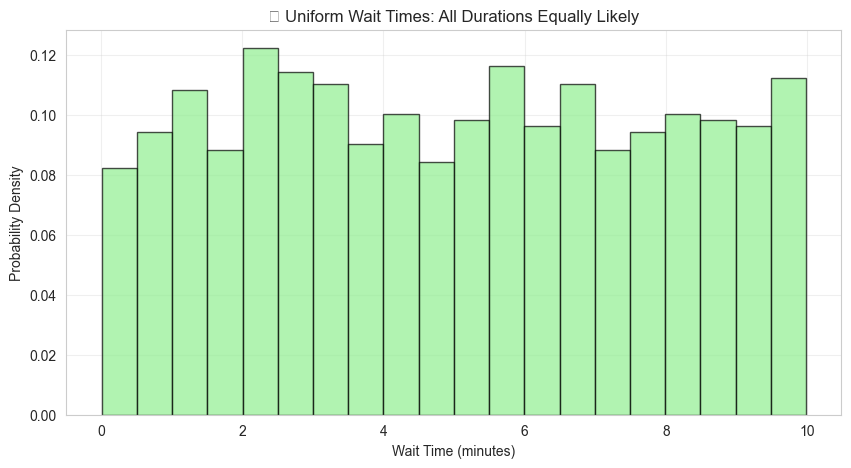

⏰ Uniform Distribution Properties:
   Mean: 5.0 min (expected: 5.0)
   All values between 0 and 10 equally likely
   Perfect for modeling random delays, lottery numbers, etc.


In [9]:
# Random wait times between 0-10 minutes
min_wait, max_wait = 0, 10
uniform_waits = np.random.uniform(min_wait, max_wait, 1000)

plt.figure(figsize=(10, 5))
plt.hist(uniform_waits, bins=20, density=True, alpha=0.7, color='lightgreen', 
         edgecolor='black')
plt.title('⏰ Uniform Wait Times: All Durations Equally Likely')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.show()

print(f"⏰ Uniform Distribution Properties:")
print(f"   Mean: {np.mean(uniform_waits):.1f} min (expected: {(min_wait + max_wait)/2})")
print(f"   All values between {min_wait} and {max_wait} equally likely")
print(f"   Perfect for modeling random delays, lottery numbers, etc.")

### 5.2 Binomial Distribution: Counting Successes

C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128231 (\N{E-MAIL SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


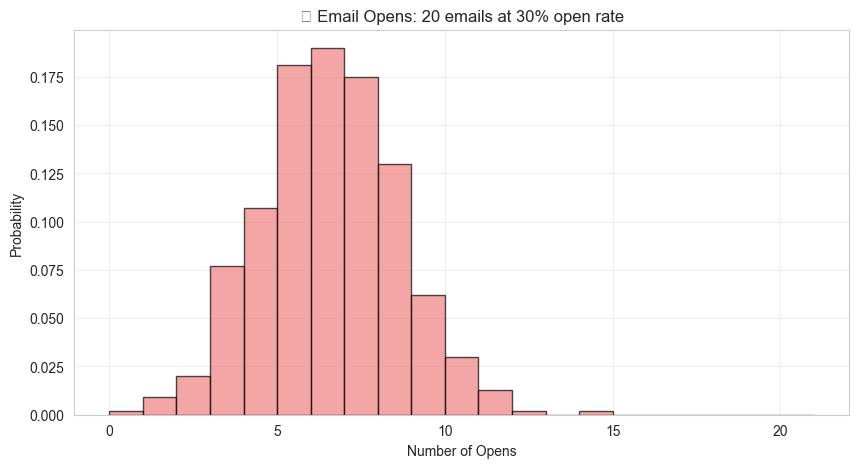

📧 Email Campaign Analysis:
   Expected opens: 6.0
   Actual average: 6.1
   Standard deviation: 2.0 (expected: 2.0)
   Most campaigns get 4-8 opens


In [10]:
# Email marketing: 20 emails sent, 30% open rate
n_emails = 20
open_rate = 0.30
n_campaigns = 1000

email_opens = np.random.binomial(n_emails, open_rate, n_campaigns)

plt.figure(figsize=(10, 5))
plt.hist(email_opens, bins=range(0, n_emails+2), density=True, alpha=0.7, 
         color='lightcoral', edgecolor='black')
plt.title(f'📧 Email Opens: {n_emails} emails at {open_rate:.0%} open rate')
plt.xlabel('Number of Opens')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)
plt.show()

expected_opens = n_emails * open_rate
expected_std = np.sqrt(n_emails * open_rate * (1 - open_rate))

print(f"📧 Email Campaign Analysis:")
print(f"   Expected opens: {expected_opens:.1f}")
print(f"   Actual average: {np.mean(email_opens):.1f}")
print(f"   Standard deviation: {np.std(email_opens, ddof=1):.1f} (expected: {expected_std:.1f})")
print(f"   Most campaigns get {expected_opens-expected_std:.0f}-{expected_opens+expected_std:.0f} opens")

**Exercise 2 — Business Application (medium)**  
A website has a 2% conversion rate. In 100 visitors, what's the probability of getting exactly 3 conversions?


In [ ]:
# Your turn - use binomial distribution
n_visitors = 100
conversion_rate = 0.02

# Calculate probability of exactly 3 conversions


<details>
<summary><b>Solution</b></summary>

```python
# Create binomial distribution
conversion_dist = stats.binom(n=n_visitors, p=conversion_rate)

# Probability of exactly 3 conversions
prob_exactly_3 = conversion_dist.pmf(3)
print(f"🎯 Conversion Analysis:")
print(f"   Visitors: {n_visitors}")
print(f"   Conversion rate: {conversion_rate:.1%}")
print(f"   P(exactly 3 conversions) = {prob_exactly_3:.3f} ({prob_exactly_3:.1%})")

# Expected conversions
expected = n_visitors * conversion_rate
print(f"   Expected conversions: {expected:.1f}")

# Probability of 0, 1, 2, or 3+ conversions
prob_0 = conversion_dist.pmf(0)
prob_1 = conversion_dist.pmf(1)
prob_2 = conversion_dist.pmf(2)
prob_3_plus = 1 - conversion_dist.cdf(2)

print(f"\n📊 Conversion Probabilities:")
print(f"   0 conversions: {prob_0:.1%}")
print(f"   1 conversion:  {prob_1:.1%}")
print(f"   2 conversions: {prob_2:.1%}")
print(f"   3+ conversions: {prob_3_plus:.1%}")
```
</details>

## 6. Real-World Business Applications

### 6.1 Quality Control

In [11]:
# Manufacturing: smartphone battery life
target_hours = 24
tolerance = 2  # ±2 hours
battery_dist = stats.norm(loc=target_hours, scale=tolerance)

# Quality control analysis
prob_defective = battery_dist.cdf(20) + (1 - battery_dist.cdf(28))
prob_acceptable = 1 - prob_defective

print("🔋 Battery Quality Control:")
print(f"   Target: {target_hours} hours ± {tolerance} hours")
print(f"   Acceptable range: 20-28 hours")
print(f"   Defect rate: {prob_defective:.1%}")
print(f"   Quality rate: {prob_acceptable:.1%}")

# Daily production impact
daily_production = 10000
expected_defects = daily_production * prob_defective
print(f"\n📊 Daily Impact ({daily_production:,} batteries):")
print(f"   Expected defects: {expected_defects:.0f} batteries")
print(f"   Daily cost at $50/defect: ${expected_defects * 50:,.0f}")

🔋 Battery Quality Control:
   Target: 24 hours ± 2 hours
   Acceptable range: 20-28 hours
   Defect rate: 4.6%
   Quality rate: 95.4%

📊 Daily Impact (10,000 batteries):
   Expected defects: 455 batteries
   Daily cost at $50/defect: $22,750


### 6.2 Customer Service Planning

In [12]:
# Call center: response times
avg_response = 180  # 3 minutes in seconds
std_response = 45   # 45 seconds
service_dist = stats.norm(loc=avg_response, scale=std_response)

# Service level analysis
prob_fast = service_dist.cdf(120)     # Under 2 minutes
prob_target = service_dist.cdf(240)   # Under 4 minutes
prob_slow = 1 - service_dist.cdf(300) # Over 5 minutes

print("📞 Call Center Performance:")
print(f"   Average response: {avg_response/60:.1f} minutes")
print(f"   Standard deviation: {std_response} seconds")
print(f"\n🎯 Service Levels:")
print(f"   Fast service (<2 min): {prob_fast:.1%}")
print(f"   Target met (<4 min): {prob_target:.1%}")
print(f"   Poor service (>5 min): {prob_slow:.1%}")

# Find percentiles for planning
percentile_90 = service_dist.ppf(0.90)
print(f"\n📊 Planning Insight:")
print(f"   90% of calls answered within: {percentile_90/60:.1f} minutes")

📞 Call Center Performance:
   Average response: 3.0 minutes
   Standard deviation: 45 seconds

🎯 Service Levels:
   Fast service (<2 min): 9.1%
   Target met (<4 min): 90.9%
   Poor service (>5 min): 0.4%

📊 Planning Insight:
   90% of calls answered within: 4.0 minutes


**Exercise 3 — Revenue Forecasting (hard)**  
Monthly sales follow a normal distribution. Build a revenue prediction model.


In [ ]:
# Historical data: monthly sales normally distributed
avg_monthly_sales = 50000  # units
std_monthly_sales = 8000   # units
price_per_unit = 25        # dollars

# Your tasks:
# 1. What's the probability of selling more than 60,000 units?
# 2. What sales volume gives 90% confidence for revenue planning?
# 3. What's the risk of revenue falling below $1M?


<details>
<summary><b>Solution</b></summary>

```python
# Create sales distribution
sales_dist = stats.norm(loc=avg_monthly_sales, scale=std_monthly_sales)

# Task 1: Probability of >60K units
prob_high_sales = 1 - sales_dist.cdf(60000)
print(f"📈 Revenue Forecasting Analysis:")
print(f"   Average monthly sales: {avg_monthly_sales:,} units")
print(f"   Standard deviation: {std_monthly_sales:,} units")
print(f"   Price per unit: ${price_per_unit}")
print(f"\n1️⃣ P(sales > 60,000) = {prob_high_sales:.1%}")

# Task 2: 90% confidence level (10th percentile)
conservative_sales = sales_dist.ppf(0.10)
conservative_revenue = conservative_sales * price_per_unit
print(f"\n2️⃣ Conservative planning (90% confidence):")
print(f"   Sales volume: {conservative_sales:,.0f} units")
print(f"   Revenue: ${conservative_revenue:,.0f}")

# Task 3: Risk of <$1M revenue
min_units_for_1m = 1000000 / price_per_unit
prob_below_1m = sales_dist.cdf(min_units_for_1m)
print(f"\n3️⃣ Revenue Risk Analysis:")
print(f"   Units needed for $1M: {min_units_for_1m:,.0f}")
print(f"   Risk of <$1M revenue: {prob_below_1m:.1%}")

# Bonus: Expected revenue
expected_revenue = avg_monthly_sales * price_per_unit
print(f"\n💰 Expected monthly revenue: ${expected_revenue:,.0f}")
```
</details>

## 7. Distribution Comparison Dashboard

C:\Users\Olivia\AppData\Local\Temp\ipykernel_28976\209662442.py:44: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Temp\ipykernel_28976\209662442.py:44: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Temp\ipykernel_28976\209662442.py:44: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Temp\ipykernel_28976\209662442.py:44: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9878 (\N{SCALE

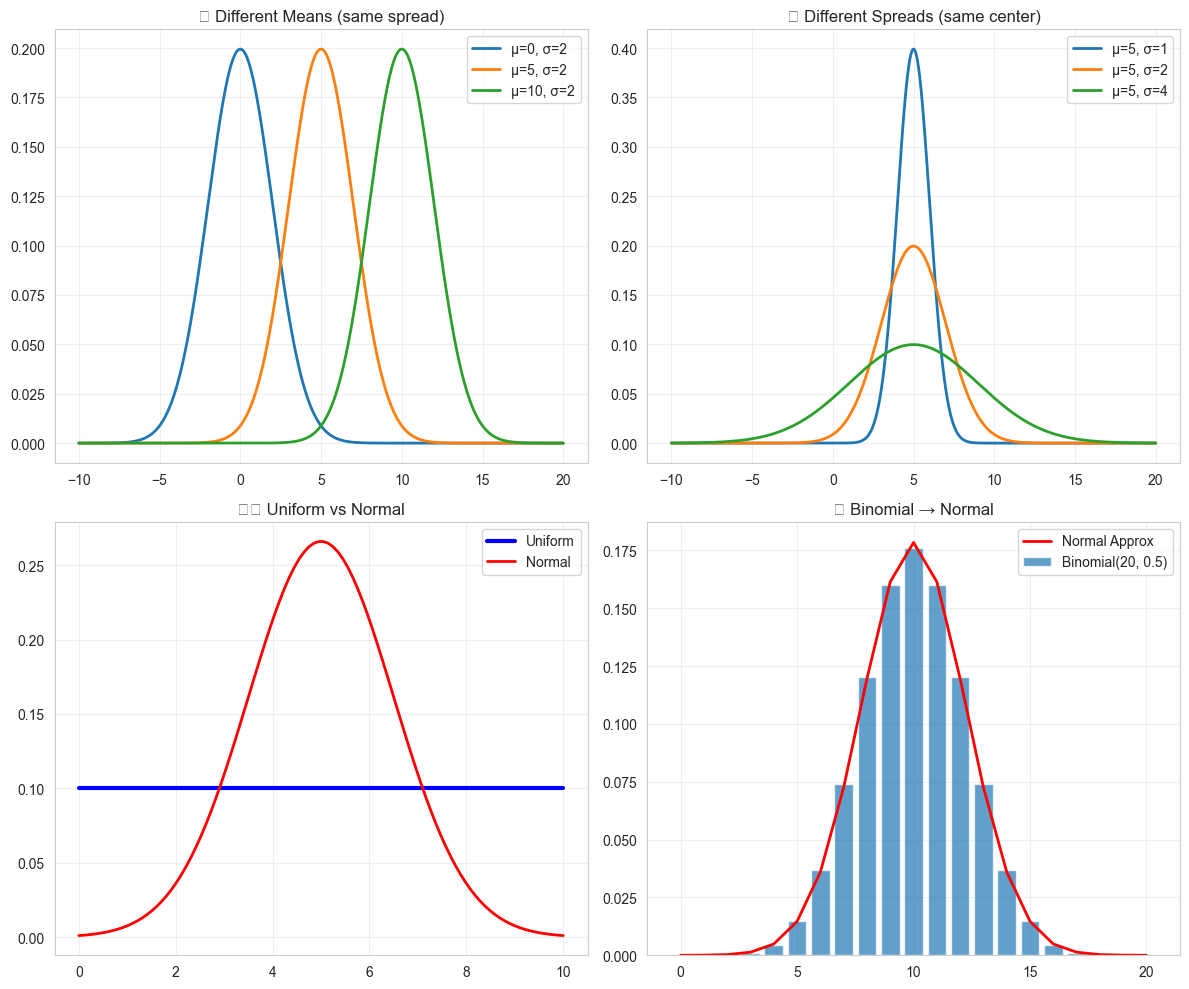

In [13]:
# Compare different normal distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
x = np.linspace(-10, 20, 1000)

# Different means, same std
axes[0,0].plot(x, stats.norm.pdf(x, 0, 2), label='μ=0, σ=2', linewidth=2)
axes[0,0].plot(x, stats.norm.pdf(x, 5, 2), label='μ=5, σ=2', linewidth=2)
axes[0,0].plot(x, stats.norm.pdf(x, 10, 2), label='μ=10, σ=2', linewidth=2)
axes[0,0].set_title('📊 Different Means (same spread)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Same mean, different stds
axes[0,1].plot(x, stats.norm.pdf(x, 5, 1), label='μ=5, σ=1', linewidth=2)
axes[0,1].plot(x, stats.norm.pdf(x, 5, 2), label='μ=5, σ=2', linewidth=2)
axes[0,1].plot(x, stats.norm.pdf(x, 5, 4), label='μ=5, σ=4', linewidth=2)
axes[0,1].set_title('📊 Different Spreads (same center)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Uniform vs Normal
uniform_x = np.linspace(0, 10, 100)
uniform_y = np.ones_like(uniform_x) * 0.1  # Uniform density
normal_x = np.linspace(0, 10, 100)
normal_y = stats.norm.pdf(normal_x, 5, 1.5)

axes[1,0].plot(uniform_x, uniform_y, 'b-', linewidth=3, label='Uniform')
axes[1,0].plot(normal_x, normal_y, 'r-', linewidth=2, label='Normal')
axes[1,0].set_title('⚖️ Uniform vs Normal')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Binomial approaching normal
binom_x = np.arange(0, 21)
binom_y = stats.binom.pmf(binom_x, 20, 0.5)
normal_approx = stats.norm.pdf(binom_x, 10, np.sqrt(5))

axes[1,1].bar(binom_x, binom_y, alpha=0.7, label='Binomial(20, 0.5)')
axes[1,1].plot(binom_x, normal_approx, 'r-', linewidth=2, label='Normal Approx')
axes[1,1].set_title('🎯 Binomial → Normal')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Mini-Challenges
- **M1 (easy):** Model customer wait times and calculate service level probabilities
- **M2 (medium):** Design a quality control system using normal distributions
- **M3 (hard):** Build a complete risk assessment model for business planning

In [ ]:
# Your turn - try the challenges!
# M1 Data: Restaurant wait times (mean=12 min, std=3 min)
# M2 Data: Product weights (target=500g, tolerance=±5g)
# M3 Data: Project completion times, cost overruns, success rates


<details>
<summary><b>Solutions</b></summary>

```python
# M1 - Restaurant Service Analysis
wait_dist = stats.norm(loc=12, scale=3)
print("🍽️ M1 - Restaurant Wait Time Analysis:")
print(f"Service levels:")
print(f"• <10 min: {wait_dist.cdf(10):.1%}")
print(f"• <15 min: {wait_dist.cdf(15):.1%}")
print(f"• >20 min: {1-wait_dist.cdf(20):.1%}")

# M2 - Quality Control System
weight_dist = stats.norm(loc=500, scale=5)
lower_limit, upper_limit = 490, 510
defect_rate = weight_dist.cdf(lower_limit) + (1 - weight_dist.cdf(upper_limit))
print(f"\n⚖️ M2 - Product Weight Quality Control:")
print(f"Specification: {lower_limit}g - {upper_limit}g")
print(f"Defect rate: {defect_rate:.2%}")
print(f"Daily defects (10K units): {defect_rate * 10000:.0f}")

# M3 - Project Risk Assessment
duration_dist = stats.norm(loc=90, scale=15)  # days
cost_dist = stats.norm(loc=100000, scale=20000)  # dollars
print(f"\n📊 M3 - Project Risk Assessment:")
print(f"Timeline risk (>120 days): {1-duration_dist.cdf(120):.1%}")
print(f"Budget risk (>$150K): {1-cost_dist.cdf(150000):.1%}")
conservative_duration = duration_dist.ppf(0.90)
conservative_cost = cost_dist.ppf(0.90)
print(f"Conservative planning (90% confidence):")
print(f"• Duration: {conservative_duration:.0f} days")
print(f"• Budget: ${conservative_cost:,.0f}")
```
</details>

## Wrap-Up & Next Steps
✅ You understand what probability distributions are and why they matter  
✅ You've mastered the normal distribution and the 68-95-99.7 rule  
✅ You can work with scipy.stats to solve real problems  
✅ You know when to use different distributions  
✅ You can apply distributions to business scenarios  

**Quick Reference Card:**
- 🔔 **Normal**: Bell curve, 68-95-99.7 rule, most common
- ⚖️ **Uniform**: All values equally likely, flat distribution
- 🎯 **Binomial**: Counting successes, yes/no outcomes
- 📊 **Use .cdf()**: "Probability less than X"
- 📊 **Use .ppf()**: "What value is at percentile P?"

**Next:** Correlation and Relationships - Discover how variables connect and influence each other!
